In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import mne

filename = "X_train/X_train.h5"

eeg1 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_1'])))

eeg2 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_2'])))


In [2]:
import scipy.signal as sc

In [ ]:

eeg3 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_3'])))
eeg4 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_4'])))
eeg5 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_5'])))
eeg6 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_6'])))
eeg7 = np.array( pd.DataFrame(np.array(h5py.File(filename)['eeg_7'])))
index = np.array( pd.DataFrame(np.array(h5py.File(filename)['index'])))
indexwindow = np.array( pd.DataFrame(np.array(h5py.File(filename)['index_window'])))
indexabsolute = np.array( pd.DataFrame(np.array(h5py.File(filename)['index_absolute'])))
pulse = np.array( pd.DataFrame(np.array(h5py.File(filename)['pulse'])))
x = np.array( pd.DataFrame(np.array(h5py.File(filename)['x'])))
y = np.array( pd.DataFrame(np.array(h5py.File(filename)['y'])))
z =np.array( pd.DataFrame(np.array(h5py.File(filename)['z'])))

In [3]:
filename='y_train.csv'

ytrain=np.array(pd.read_csv(filename))

In [8]:
eeg1norm=np.divide(eeg1,np.sqrt(np.reshape(np.var(eeg1,axis=1),(24688,1))))  #all time series have a std deviation of 1.
eeg2norm=np.divide(eeg2,np.sqrt(np.reshape(np.var(eeg2,axis=1),(24688,1))))  #all time series have a std deviation of 1.

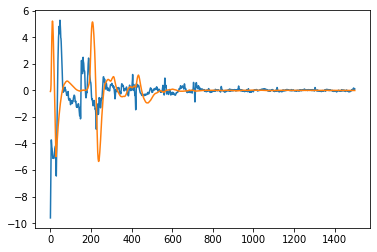

In [45]:
i=2
plt.plot(eeg1norm[i])
plt.plot(eeg2norm[i])

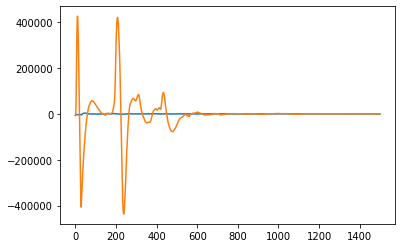

In [46]:
plt.plot(eeg1[i])
plt.plot(eeg2[i])

In [51]:
con=sc.fftconvolve(eeg1norm,eeg2norm,axes=1)
cor=np.sum(con,axis=1)
cor.shape

(24688,)

(-500.0, 500.0)

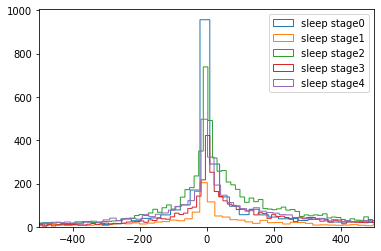

In [52]:
for i in range(5):
    plt.hist(cor[np.where(ytrain[:,1]==i)]/len(np.where(ytrain[:,1]==i)),bins=10000,histtype='step',label='sleep stage'+str(i))
    plt.legend()
plt.xlim(-500,500)

In [53]:
print(np.mean(cor),np.var(cor))


371.21793 15641549.0


In [54]:
con=sc.fftconvolve(eeg1norm[1:],eeg2norm[:-1],axes=1)
cor=np.sum(con,axis=1)
cor.shape
print(np.mean(cor),np.var(cor))

(24687,)

In [65]:
con=sc.fftconvolve(eeg1,eeg2,axes=1)
cor=np.sum(con,axis=1)
cor.shape


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [71]:
(cor>0)*(ytrain[:,1]==0)

array([False,  True,  True, ..., False, False,  True])

0
1
2
3
4


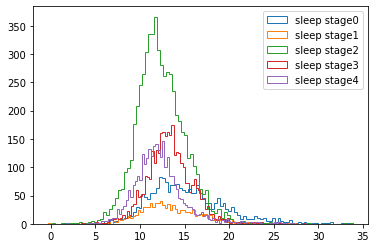

In [78]:
for i in range(5):
    plt.hist(np.log(cor[np.where((cor>0)*(ytrain[:,1]==i))])/len(np.where(ytrain[:,1]==i)),bins=100,histtype='step',label='sleep stage'+str(i))
    plt.legend()
    print(i)